In [3]:
import random

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
hostnames = []
dataset = []
df = None 

In [5]:
def set_hostnames(number_of_hosts: int) -> None:                                       #Indicamos que la funcion no devuleve nada com '-> None'
    hostnames_pref = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1                             # Linux 40% / Solaris 30% / AIX 20% / HP-UX 10%
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30                     # Development 10% / Integration 10% / Testing 25% /Staging 25% / Production 30%
    pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30   # Norway 6% / France 9% / Italy 16% / Spain 16% / Germany 23% / Ireland 30%
    parte_alfabetica = []
    
    for i in range(number_of_hosts):
        pais_azar = random.choice(pais)
        hosts = random.choice(hostnames_pref) + random.choice(entorno)
        hosts += pais_azar
        
        parte_alfabetica.append(hosts)
        
        hosts += str(parte_alfabetica.count(hosts)).zfill(3)                           #zfill completa por la izq 0 hasta llegar al num en ()
        
        hostnames.append(hosts)

In [6]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
         return 'Solaris'
    elif hostname.startswith('A'):
         return 'AIX'
    elif hostname.startswith('H'):
         return 'HP-UX'
    else:
        return 'Unknow'

In [7]:
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Develpment'
    elif hostname[1] == 'I':
         return 'Integration'
    elif hostname[1] == 'T':
         return 'Testing'
    elif hostname[1] == 'S':
         return 'Staging'
    elif hostname[1] == 'P':
         return 'Production'
    else:
        return 'Unknow'

In [8]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
         return 'Germany'
    elif hostname[2:5] == 'ITA':
         return 'Italy'
    elif hostname[2:5] == 'ESP':
         return 'Spain'
    elif hostname[2:5] == 'IRL':
         return 'Ireland'
    elif hostname[2:5] == 'FRA':
         return 'France'
    else:
        return 'Unknow'

In [9]:
def set_dataframe(count: int)-> None:
    global df                                        #Se usa global porque no tiene valor
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname' : hostname,
            'os' : get_os(hostname),
            'environment' : get_environment(hostname),
            'country' : get_country(hostname),
            'node' : int(hostname[-3:])    
        })
        
        
    df = pd.DataFrame(dataset)

In [10]:
set_dataframe(1500)

In [11]:
df

,hostname,os,environment,country,node
0,LTNOR001,Linux,Testing,Norway,1
1,LSDEU001,Linux,Staging,Germany,1
2,LTDEU001,Linux,Testing,Germany,1
3,ATESP001,AIX,Testing,Spain,1
4,LIESP001,Linux,Integration,Spain,1
...,...,...,...,...,...
1495,SPDEU043,Solaris,Production,Germany,43
1496,LTIRL047,Linux,Testing,Ireland,47
1497,LPIRL055,Linux,Production,Ireland,55
1498,LIESP012,Linux,Integration,Spain,12


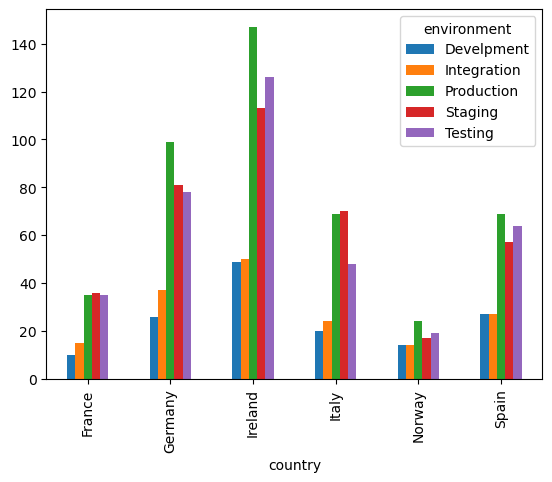

In [12]:
df_pais_envir = df.groupby(['country', 'environment']).size()

df_pais_envir.unstack().plot(kind='bar');

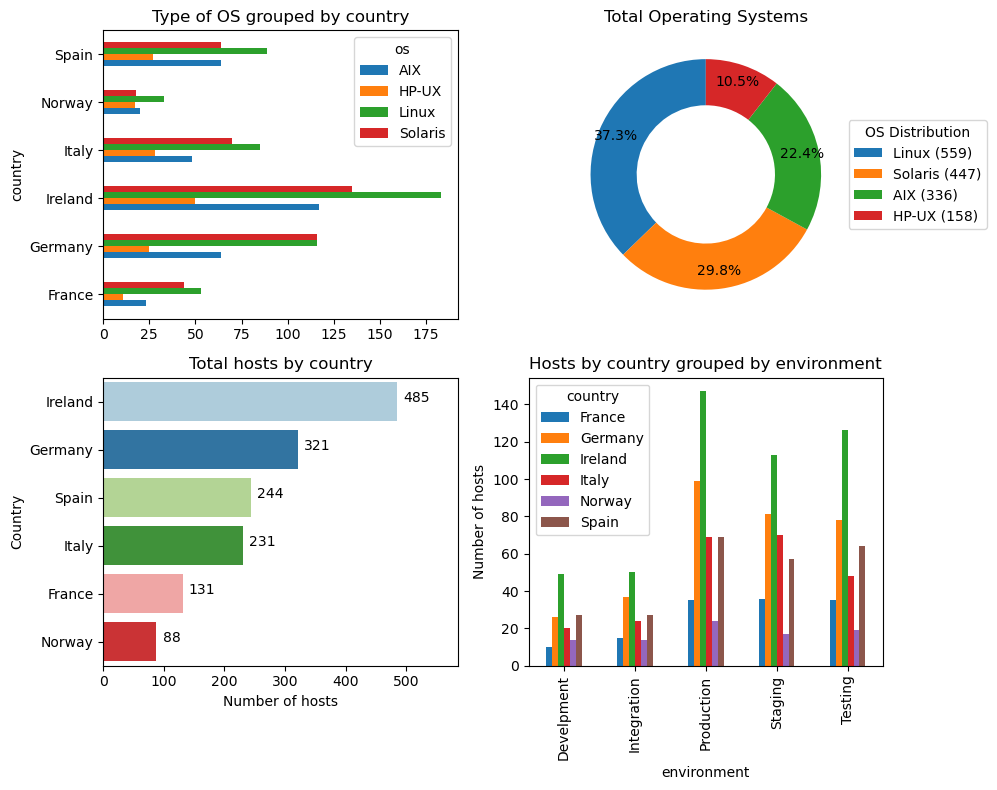

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


os_country = df.groupby(['country', 'os']).size().unstack()
os_country.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')


total_os = df['os'].value_counts()
axs[0, 1].pie(total_os, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
axs[0, 1].set_title('Total Operating Systems')

legend_labels = [f'{label} ({value})' for label, value in zip(total_os.index, total_os)]
axs[0, 1].legend(legend_labels, loc='center right', bbox_to_anchor=(1.5, 0.5), title='OS Distribution')


total_hosts_country = df['country'].value_counts()
sns.barplot(x=total_hosts_country.values, y=total_hosts_country.index, ax=axs[1, 0], palette="Paired")
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')

for i, v in enumerate(total_hosts_country.values):
    axs[1, 0].text(v + 10, i, str(v), color='black')

axs[1, 0].set_xlim(0, max(total_hosts_country.values) + 100)


df.groupby(['country', 'environment']).size().unstack(0).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1, 1].set_ylabel('Number of hosts')


fig.tight_layout()

plt.show()